In [1]:
from selenium import webdriver
import time

driver = webdriver.Chrome('/Users/lionheart/anaconda3/pkgs/chromedriver-binary-2.38-0/bin/chromedriver-binary')
driver.get('https://twitter.com/search?q=%23cats&src=typd')

# Selenium script to scroll to the bottom, wait 5 seconds for the next batch of data to load, then continue scrolling.  It will continue to do this until the page stops loading new data.
lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
counter = 10
while(match==False or counter > 0):
    lastCount = lenOfPage
    time.sleep(5)
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True
    counter -= 1

# Now that the page is fully scrolled, grab the source code.
source_data = driver.page_source

In [2]:
from bs4 import BeautifulSoup
import string
import nltk

# Throw source into BeautifulSoup and start parsing.
soup = BeautifulSoup(source_data, "html.parser")
    
# Take out the <div> of name and get its value
posts = soup.findAll("div", {"class": "js-tweet-text-container"})

postwords = []
words = set(nltk.corpus.words.words())

# name = name_box.strip() # strip() is used to remove starting and trailing
# name_box.text returns only text within HTML tags without the tags
for x in posts:
    posttext = x.text.replace('\n','').replace('’','').replace('#','')
    posttext = posttext.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(posttext.lower())
    postwords.extend(tokens)

nlp_sample = []
    
for w in postwords:
    if w in words:
        nlp_sample.append(w)

print(nlp_sample)

['um', 'what', 'broken', 'pooped', 'been', 'on', 'pest', 'control', 'duty', 'today', 'theres', 'a', 'fly', 'about', 'and', 'its', 'making', 'a', 'mockery', 'out', 'of', 'me', 'the', 'one', 'that', 'does', 'the', 'around', 'here', 'big', 'world', 'small', 'kitten', 'show', 'me', 'your', 'professorial', 'majestic', 'forest', 'i', 'present', 'to', 'you', 'sprite', 'courtesy', 'of', 'the', 'wonderful', 'aka', 'poorly', 'drawn', 'ride', 'on', 'the', 'sea', 'this', 'is', 'ludo', 'telling', 'me', 'its', 'din', 'din', 'times', 'your', 'will', 'not', 'approve', 'didnt', 'realize', 'she', 'was', 'giving', 'me', 'the', 'stink', 'eye', 'i', 'got', 'up', 'in', 'the', 'morning', 'into', 'the', 'bathroom', 'and', 'this', 'was', 'waiting', 'for', 'siren', 'woke', 'up', 'the', 'entire', 'house', 'at', 'am', 'why', 'i', 'dont', 'know', 'needs', 'her', 'beauty', 'sleep', 'otherwise', 'she', 'will', 'be', 'almost', 'unbearable', 'during', 'the', 'day', 'better', 'off', 'to', 'the', 'garden', 'now', 'happy

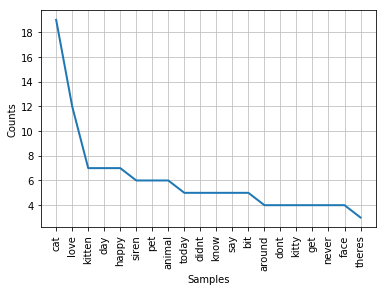

In [3]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = nlp_sample[:]
for token in nlp_sample:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

freq = nltk.FreqDist(t for t in clean_tokens)
# for key,val in freq.items():
    # print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)